In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt


farm_size = (10, 10)
farm_grid = np.zeros(farm_size)

obstacles = [(3, 3), (3, 4), (4, 3), (6, 6), (7, 6)]
poor_soil = [(1, 8), (2, 7), (3, 6)]


for x, y in obstacles:
    farm_grid[x, y] = -1
for x, y in poor_soil:
    farm_grid[x, y] = 1




pest_types = {"Low": 1, "Medium": 2, "High": 3} #pest infestation levels
pests = {}
num_pests = 8

for _ in range(num_pests):
    x, y = random.randint(0, 9), random.randint(0, 9)
    while farm_grid[x, y] == -1:
        x, y = random.randint(0, 9), random.randint(0, 9)

    pest_level = random.choice(list(pest_types.keys()))
    pests[(x, y)] = pest_level

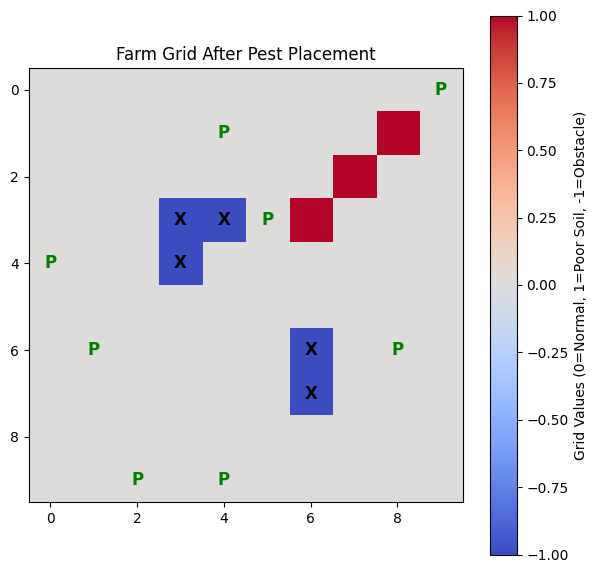

In [ ]:

plt.figure(figsize=(7, 7))
plt.imshow(farm_grid, cmap="coolwarm", origin="upper")
plt.colorbar(label="Grid Values (0=Normal, 1=Poor Soil, -1=Obstacle)")


for x, y in obstacles:
    plt.text(y, x, "X", ha='center', va='center', color="black", fontsize=12, fontweight="bold")


for (x, y), pest in pests.items():
    plt.text(y, x, "P", ha='center', va='center', color="green", fontsize=12, fontweight="bold")

plt.title("Farm Grid After Pest Placement")
plt.show()

In [ ]:

pest_classes = {
    "Low": 5,
    "Medium": 10,
    "High": 20
}

bioenergy_map = np.zeros(farm_size)
for (x, y), pest in pests.items():
    bioenergy_map[x, y] += pest_classes[pest]

In [ ]:
hotspots = []
bioenergy_threshold = 15  # If a cell has 15+ energy, it's a hotspot

for x in range(farm_size[0]):
    for y in range(farm_size[1]):
        if bioenergy_map[x, y] >= bioenergy_threshold:
            hotspots.append((x, y))

for x, y in hotspots:
    farm_grid[x, y] = 2

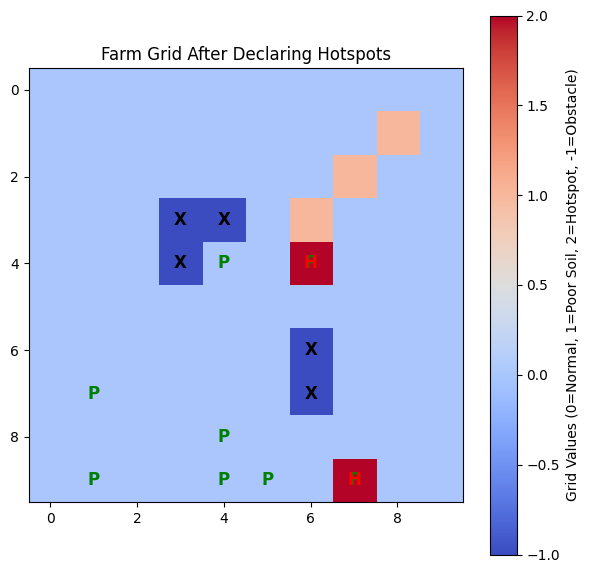

In [ ]:

plt.figure(figsize=(7, 7))
plt.imshow(farm_grid, cmap="coolwarm", origin="upper")
plt.colorbar(label="Grid Values (0=Normal, 1=Poor Soil, 2=Hotspot, -1=Obstacle)")

for x, y in obstacles:
    plt.text(y, x, "X", ha='center', va='center', color="black", fontsize=12, fontweight="bold")
for (x, y), pest in pests.items():
    plt.text(y, x, "P", ha='center', va='center', color="green", fontsize=12, fontweight="bold")
for x, y in hotspots:
    plt.text(y, x, "H", ha='center', va='center', color="red", fontsize=12, fontweight="bold")

plt.title("Farm Grid After Declaring Hotspots")
plt.show()


In [ ]:

alpha = 0.1 #controls how fast the agent learns i.e. Learning Rate
gamma = 0.9 #Discount factor like how much does the future rewards matter
epsilon = 1.0 #exploration- probability of taking a random action
epsilon_decay = 0.995 #decay factor- after a time epsilon reduces, favouring exploitation
episodes = 1000 #1000 training episodes

Q = np.zeros((farm_size[0], farm_size[1], 4))
actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

for episode in range(episodes):
    x, y = random.randint(0, 9), random.randint(0, 9)

    while farm_grid[x, y] == -1:
        x, y = random.randint(0, 9), random.randint(0, 9)

    for _ in range(100):
        if random.uniform(0, 1) < epsilon:
            action_idx = random.randint(0, 3)
        else:
            action_idx = np.argmax(Q[x, y])

        dx, dy = actions[action_idx]
        new_x, new_y = max(0, min(9, x + dx)), max(0, min(9, y + dy))

        if farm_grid[new_x, new_y] == -1:
            continue


        if (new_x, new_y) in poor_soil:
            reward = 10
        elif (new_x, new_y) in hotspots:
            reward = 20
        else:
            reward = -0.1

        Q[x, y, action_idx] = Q[x, y, action_idx] + alpha * (reward + gamma * np.max(Q[new_x, new_y]) - Q[x, y, action_idx])

        x, y = new_x, new_y

    epsilon *= epsilon_decay

In [ ]:
def get_best_path(start):
    path = [start]
    x, y = start
    movements = []

    while (x, y) not in hotspots:
        action_idx = np.argmax(Q[x, y])
        dx, dy = actions[action_idx]
        new_x, new_y = max(0, min(9, x + dx)), max(0, min(9, y + dy))

        if (new_x, new_y) == (x, y):
            break

        movements.append(f"Robot moves to ({new_x}, {new_y})")
        path.append((new_x, new_y))
        x, y = new_x, new_y

    return path, movements


robot_start = (0, 0)
while farm_grid[robot_start] == -1:
    robot_start = (random.randint(0, 9), random.randint(0, 9))

robot_path, robot_movements = get_best_path(robot_start)


print("\n Robot Movement Steps:")
for step in robot_movements:
    print(step)



 Robot Movement Steps:
Robot moves to (0, 1)
Robot moves to (1, 1)
Robot moves to (1, 2)
Robot moves to (2, 2)
Robot moves to (2, 3)
Robot moves to (2, 4)
Robot moves to (2, 5)
Robot moves to (3, 5)
Robot moves to (3, 6)
Robot moves to (4, 6)


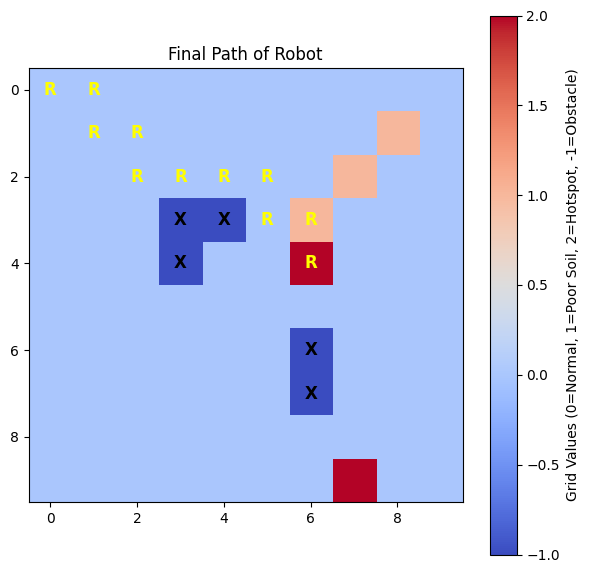

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(farm_grid, cmap="coolwarm", origin="upper")
plt.colorbar(label="Grid Values (0=Normal, 1=Poor Soil, 2=Hotspot, -1=Obstacle)")

for x, y in obstacles:
    plt.text(y, x, "X", ha='center', va='center', color="black", fontsize=12, fontweight="bold")
for x, y in robot_path:
    plt.text(y, x, "R", ha='center', va='center', color="yellow", fontsize=12, fontweight="bold")

plt.title("Final Path of Robot")
plt.show()